# Financial Fraud EDA

*Data Analyst*
- 1. Are there any null values or duplicated values? How will you wrangle/handle them?
- 2. Are there any variables that warrant transformations?
- 3. Do you notice any patterns or anomalies in the data? Can you plot them?

*Data Statistic*
- 1. Distribution of Fraud per Day
- 2. Distribution of Flagged Fraud per Day
- 3. Distribution of Total Transaction per Day
- 4. Bar Chart by type
- 5. Total Fraud
- 6. Total Flagged Fraud
- 7. Amount Flagged Fraud
- 8. Total Amount is Fraud
- 9. Machine Learning Fraud Detection

Soal Machine Learning:
- Jika tipe transaksi adalah payment, dengan total transaksi 1,060.31 USD, Saldo awal 1089 USD, Saldo akhir 28.69, saldo awal tujuan 0 dan saldo akhir tujuan 0, apakah termasuk penipuan?

*Data Visualization*

Will be showing in Power BI

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Apakah Format Data Sudah Sesuai??

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Null Values and Transformation

- Check apakah ada cell yang tidak terisi

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- Transformasi nama kolom

In [5]:
df = df.rename(columns={'step': 'day'})

**Tidak ada Cell yang kosong**

- Apakah ada data yang terduplikasi?

In [6]:
df.duplicated().sum()

0

**Tidak ada data yang terduplikasi**

In [7]:
df.describe()

,day,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Check Korelasinya**

*Korelasi pada data dapat digunakan untuk analisa*

In [38]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


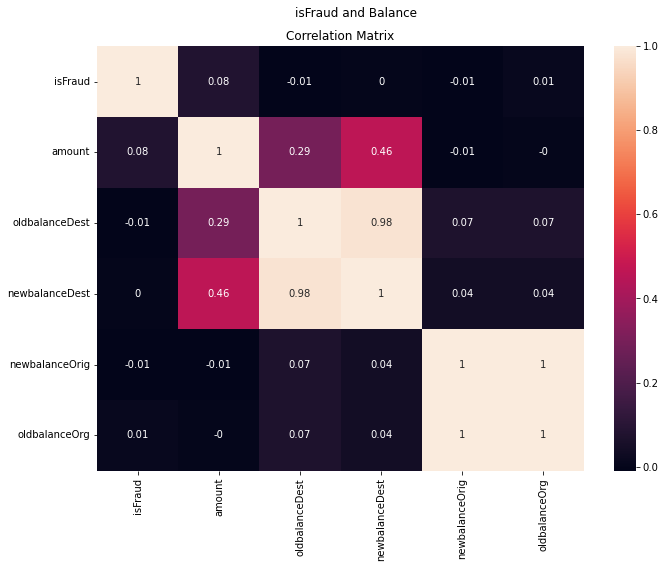

In [9]:
df_indep = pd.DataFrame(df[['isFraud','amount','oldbalanceDest','newbalanceDest','newbalanceOrig','oldbalanceOrg']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('isFraud and Balance')
plt.tight_layout()

- Pada korelasi matrix diatas dapat dilihat penarikan ilegal dapat diasumsikan tidak terdapat korelasi dalam hal apapun
- Saldo yang baru menunjukkan korelasi terhadap saldo lama dan jumlah transfer, artinya apabila saldo lama terjadi penarikan dan sebagainya, maka akan mempengaruhi saldo yang baru

# Data Analytics

# Fraud Distribution

In [10]:
df_fraud = df.groupby('day')['isFraud'].sum().reset_index()
df_fraud

,day,isFraud
0,1,16
1,2,8
2,3,4
3,4,10
4,5,6
...,...,...
738,739,10
739,740,6
740,741,22
741,742,14


C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

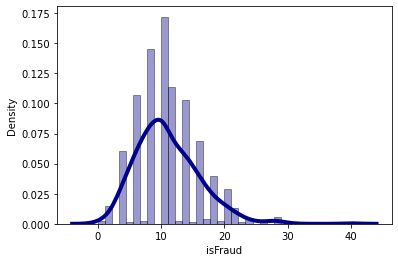

In [11]:
sns.distplot(df_fraud['isFraud'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata terduga kasus penipuan uang perharinya adalah **10 kasus perhari**

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='Density'>

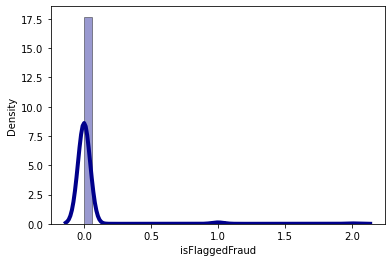

In [12]:
df_isflag = df.groupby('day')['isFlaggedFraud'].sum().reset_index()
sns.distplot(df_isflag['isFlaggedFraud'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata kasus tersangka penipuan adalah 0

C:\Users\MrBento\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

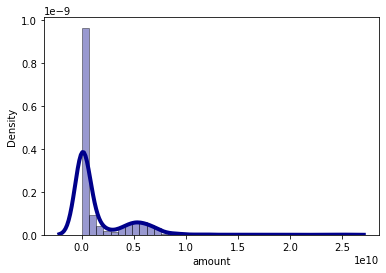

In [13]:
df_amount = df.groupby('day')['amount'].sum().reset_index()
sns.distplot(df_amount['amount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Rata-rata transaksi perhari adalah 0,01 x 10^(7) yaitu 100,000 USD atau setara 1,5 Miliar Rupiah

In [14]:
df_type = df.groupby('type')['nameOrig'].count().reset_index()
df_type = df_type.rename(columns={'nameOrig': 'Total Customer'})

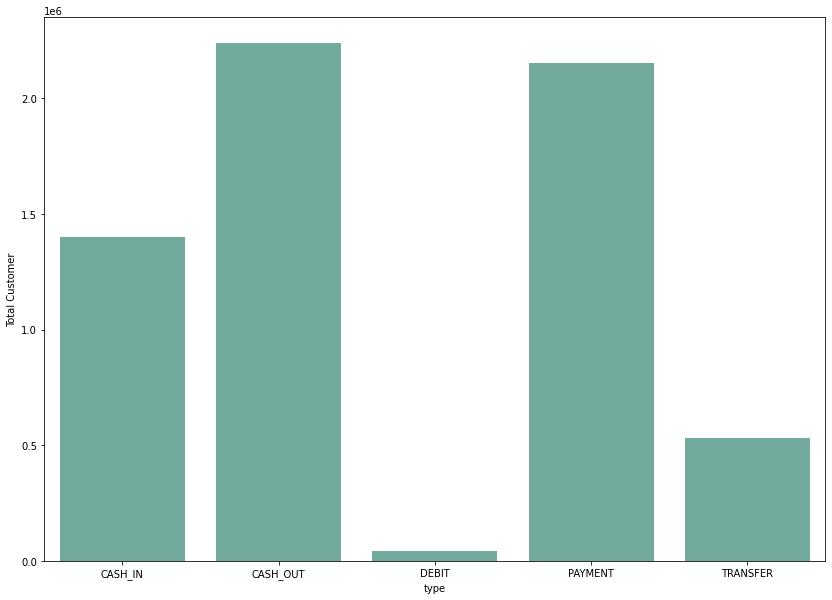

In [15]:
plt.figure(figsize=(14, 10))
# Make a barplot
sns.barplot(
    x="type", 
    y="Total Customer", 
    data=df_type, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

Transaksi paling banyak adalah **Cash Out**, karena **rata-rata penipuan bermuara dengan Cash Out**. Sementara itu transaksi terbesar kedua adalah **Payment**, karena pada saat ini payment bisa dilakukan dimana saja dan kapan saja, seperti lewat **handphone ataupun kartu kredit**.

In [16]:
df['isFraud'].sum()

8213

In [17]:
df_fra = df.loc[(df['isFraud']==1)]
df_fra

,day,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


Rata-rata kasus terduga penipuan adalah transaksinya sejumlah saldo yang disisakan 0, sehingga harus di check lebih lanjut

In [18]:
df['isFlaggedFraud'].sum()

16

In [19]:
df_isfra = df.loc[(df['isFlaggedFraud']==1)]
df_isfra_1 = df_isfra['oldbalanceOrg']-df_isfra['amount']
df_isfra_1

2736446           0.00
3247297           0.00
3760288           0.00
5563713           0.00
5996407     9585040.37
5996409    10000000.00
6168499           0.00
6205439           0.00
6266413           0.00
6281482      399045.08
6281484    10000000.00
6296014           0.00
6351225           0.00
6362460     7316255.05
6362462    10000000.00
6362584           0.00
dtype: float64

In [20]:
df_isfra

,day,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Ternyata tersangka penipuan yang sebenarnya adalah dengan mengosongkan rekening korban serta transfer uang dalam jumlah yang sangat besar, biasanya bersisa 30%.

# Encoding Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [22]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [23]:
type_balance = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

In [24]:
enc = OrdinalEncoder(categories=[type_balance])

In [25]:
df[['type']] = enc.fit_transform(df[['type']])

In [26]:
df['type'].unique()

array([0., 1., 2., 3., 4.])

In [27]:
df

,day,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0.0,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,0.0,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,1.0,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,2.0,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,0.0,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2.0,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,1.0,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,2.0,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,1.0,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Drop Kolom Name

In [40]:
cols_drop2 = ['nameOrig','nameDest','type','isFlaggedFraud']
df = df.drop(cols_drop2,axis=1)

In [41]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,181.00,181.00,0.00,0.00,0.00,1
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1


# Split Data for Machine Learning

In [42]:
X = df.drop(['isFraud'],axis=1)
Y = df['isFraud']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.0001, random_state = 0)

# 1. Decision Tree

In [44]:
from sklearn import tree
df_decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.01)#build
df_decision_tree.fit(X_train,Y_train)#train
df_decision_tree.score(X_test,Y_test)#predict

y_pred = df_decision_tree.predict(X_test)
df_decision_tree.score(X_test,Y_test)

1.0

In [45]:
y_pred = df_decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[637]], dtype=int64)

In [46]:
df_decision_tree.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 2. Random Forest

In [48]:
from sklearn import ensemble
R_forest = ensemble.RandomForestClassifier(n_estimators=100)
R_forest.fit(X_train,Y_train)
R_forest.score(X_test,Y_test)

1.0

In [49]:
y_pred = R_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[637]], dtype=int64)

In [74]:
R_forest.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 3. Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
Naive_B = GaussianNB()
Naive_B.fit(X_train,Y_train)
Naive_B.score(X_test,Y_test)

0.9984301412872841

In [69]:
y_pred = Naive_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[636,   1],
       [  0,   0]], dtype=int64)

In [75]:
Naive_B.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 4. KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_N = KNeighborsClassifier(n_neighbors=3)
K_Nearest_N.fit(X_train,Y_train)
K_Nearest_N.score(X_test,Y_test)

1.0

In [71]:
y_pred = K_Nearest_N.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[637]], dtype=int64)

In [76]:
K_Nearest_N.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 5. Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,Y_train)
Logistic_R.score(X_test,Y_test)

0.9984301412872841

In [73]:
y_pred = Logistic_R.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[636,   1],
       [  0,   0]], dtype=int64)

In [77]:
Logistic_R.predict([[0,1060.31,1089.0,28.69,0,0]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Kesimpulan

Berdasarkan Financial Fraud EDA, didapat beberapa kesimpulan yaitu.
- 1. Tidak ada korelasi antara penipuan terhadap tipe pembayaran ataupun banyaknya rekening. Artinya rekening yang memiliki tabungan yang sedikit juga bisa terkena penipuan.
- 2. Total terduga penipuan adalah 8123, dengan rata-rata terduga penipuan perhari yang ditangani sekitar **10 akun.** Modus dari terduga penipuan adalah mengosongkan akun korban, sehingga patut diduga sebagai penipuan.
- 3. Total tersangka penipuan adalah 16 akun, dengan rata-rata tersangka penipuan perhari adalah **0**. Modus dari tersangka penipuan adalah transaksi dalam jumlah yang sangat besar, bahkan ada yang langsung mengosongkan akun, sehingga perlu didalami apakah hal tersebut termasuk penipuan atau tidak.
- 4. Rata-rata transaksi perhari **1.5 Miliar Rupiah**
- 5. Transaksi paling banyak adalah **Cash Out**, karena penipuan kebanyakan berakhir dengan Cash Out.
- 6. Transaksi kedua yang paling banyak adalah **Payment**, karena pada masa sekarang semua orang bisa melakukan pembayaran tanpa menuju ke tempat penjual.
- 7. Jawaban dari soal Machine Learning diatas adalah bukan terduga penipuan